In [1]:
#import impulsegpt_sdpa
import torch
from torch import nn
from torchinfo import summary
from transformers import AutoTokenizer
from matplotlib import pyplot as plt


In [2]:
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("Using CUDA")
    print(torch.cuda.get_device_capability())
elif torch.backends.mps.is_available():
    device = torch.device('mps')
    print("Using MPS")
else:
    print("Using CPU")


Using CUDA
(8, 6)


In [3]:
model = torch.load('ckpt/impgpt-128-final-1.pt', weights_only=False)
summary(model)

Layer (type:depth-idx)                   Param #
ImpulseGPT                               --
├─Embedding: 1-1                         38,597,376
├─ModuleList: 1-2                        --
│    └─Layer: 2-1                        --
│    │    └─RoPE: 3-1                    --
│    │    └─RoPE: 3-2                    --
│    │    └─Linear: 3-3                  589,824
│    │    └─Linear: 3-4                  196,608
│    │    └─Linear: 3-5                  196,608
│    │    └─Linear: 3-6                  590,592
│    │    └─Sequential: 3-7              4,722,432
│    │    └─Dropout: 3-8                 --
│    └─Layer: 2-2                        --
│    │    └─RoPE: 3-9                    --
│    │    └─RoPE: 3-10                   --
│    │    └─Linear: 3-11                 589,824
│    │    └─Linear: 3-12                 196,608
│    │    └─Linear: 3-13                 196,608
│    │    └─Linear: 3-14                 590,592
│    │    └─Sequential: 3-15             4,722,432
│    │   

In [4]:
#tokenizer = AutoTokenizer.from_pretrained('google-bert/bert-base-chinese')
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neo-125m")

In [42]:
start_ids = torch.tensor(tokenizer.encode('One day,')).unsqueeze(dim=0).to(device=device)
max_length = 120
y = model.generate(start_ids, max_length=max_length, top_k=20, temp=1)
print(y)
txt = tokenizer.decode(y[0].tolist(), skip_special_tokens=True)
print(y.shape)
print(txt)

tensor([[ 3198,  1110,    11,  5045,  1820,   290,   465,  1995,  1820,  1816,
           284,   262,  3650,    13,  5045,  1820,  2497,   257,  8258,  6512,
           351,   257, 22441,   307,   461,    13,   679,  1965,   465,  1995,
          1820,   611,   339,   714,   423,   262,  6512,    13,  2399,  1995,
          1820,   531,   645,    11,   475,  5045,  1820,  2227,   262,  6512,
           284,   467,  1497,    13,   198,   198, 18602,   326,  1110,    11,
          5045,  1820,  1392,  6639,    13,   679,  2067,   284,  5490,    13,
           679,   750,   407,   760,   703,   284,   787,   340,  1365,    13,
          2399,  1995,  1820,  1297,   683,   326,   611,   339,   750,   407,
          1011,  1337,   286,   262,  6512,    11,   340,   561,  1037,   683,
            13,  5045,  1820,   531,  7926,   290,  4030, 13774,    13,   198,
           198,  6653,  1995,  1820,  3088,   284,   787,   683,  1254,  1365,
            13,  1375,   531]], device='cuda:0')
tor

tensor(612)


' there'

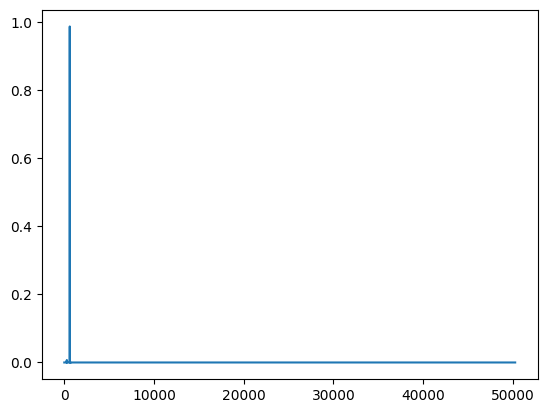

In [6]:
y = model(start_ids)
prob = nn.functional.softmax(y, dim=-1).cpu().detach().squeeze()
token_max = torch.argmax(prob)
print(token_max)
plt.plot(prob)
tokenizer.decode([token_max.tolist()])